###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving college_1.csv to college_1.csv
Saving college_2.csv to college_2.csv


In [3]:
file_1 = pd.read_csv(io.BytesIO(uploaded['college_1.csv']))
file_2 = pd.read_csv(io.BytesIO(uploaded['college_2.csv']))

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [4]:
file=pd.concat([file_1,file_2], ignore_index=True)
file

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [5]:
Exceeded_expectations=file[file["CodeKata Score"] >= 15000]
Exceeded_expectations.to_csv("Exceeded_expectations.csv",index=False)

In [6]:
Reached_expectations=file[(file["CodeKata Score"] >= 10000) & (file["CodeKata Score"] < 15000)]
Reached_expectations.to_csv("Reached_expectations.csv",index=False)

In [7]:
Needs_Improvement=file[(file["CodeKata Score"] >= 7000) & (file["CodeKata Score"] < 10000)]
Needs_Improvement.to_csv("Needs_Improvement.csv",index=False)

In [8]:
Unsatisfactory=file[file["CodeKata Score"] < 7000]
Unsatisfactory.to_csv("Unsatisfactory.csv",index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)




In [9]:
print("Average Previous Geekions :",round(file["Previous Geekions"].mean(),2))
print("Average CodeKata Score :",round(file["CodeKata Score"].mean(),2))

Average Previous Geekions : 3842.35
Average CodeKata Score : 4051.76


###### No of students participated 

In [10]:
file["Name"].count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [11]:
print("Average python completion :",round(file["python"].mean(),2))
print("Average my_sql completion :",round(file["mysql"].mean(),2))
print("Average python english completion :",round(file["python_en"].mean(),2))
print("Average computational thinking completion :",round(file["computational_thinking"].mean(),2))

Average python completion : 54.35
Average my_sql completion : 23.5
Average python english completion : 29.66
Average computational thinking completion : 2.2


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [12]:
rising_star=file.nlargest(3, 'Rising')
rising_star[['Name','Rising']]

,Name,Rising
92,shifak N,3140
86,Ganesh Ramkumar R,2000
102,Narasimhan Y L,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [13]:
Shining_stars=file.nlargest(3,'Previous Geekions')
Shining_stars[['Name','Previous Geekions']]

,Name,Previous Geekions
0,A.Dharani,24500
1,V.JEEVITHA,21740
2,HEMAVATHI.R,19680


###### Department wise codekata performence (pie chart)

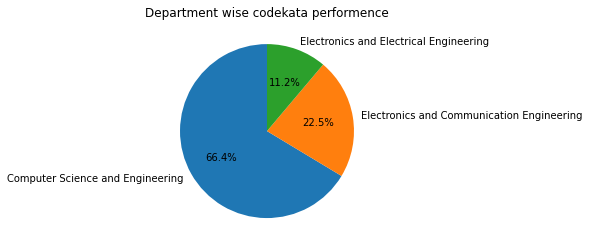

In [14]:
Dept_Codekata=file.groupby(['Department']).sum()
Dept_Codekata=Dept_Codekata.reset_index()
Dept_Codekata[["Department","CodeKata Score"]]
plt.pie(Dept_Codekata['CodeKata Score'],labels=Dept_Codekata["Department"],startangle=90,autopct='%1.1f%%')
plt.title('Department wise codekata performence')
plt.show() 

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


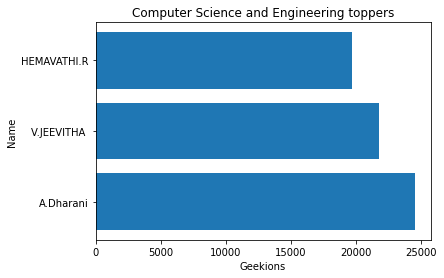

In [15]:
cse=file[file['Department']=='Computer Science and Engineering']
cse['Rank']=cse['Previous Geekions'].rank(ascending = 0)
top_cse=cse.nsmallest(3, 'Rank')
plt.barh(top_cse['Name'],top_cse['Previous Geekions'])
plt.ylabel("Name")
plt.xlabel("Geekions")
plt.title('Computer Science and Engineering toppers')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


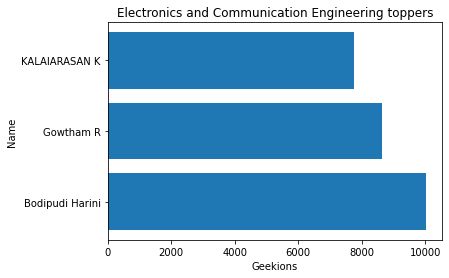

In [16]:
ece=file[file['Department']=='Electronics and Communication Engineering']
ece['Rank']=ece['Previous Geekions'].rank(ascending = 0)
top_ece=ece.nsmallest(3, 'Rank')
plt.barh(top_ece['Name'],top_ece['Previous Geekions'])
plt.ylabel("Name")
plt.xlabel("Geekions")
plt.title('Electronics and Communication Engineering toppers')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


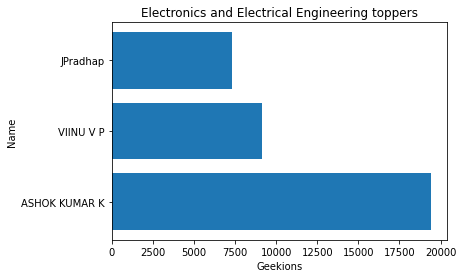

In [17]:
eee=file[file['Department']=='Electronics and Electrical Engineering']
eee['Rank']=eee['Previous Geekions'].rank(ascending = 0)
top_eee=eee.nsmallest(3, 'Rank')
plt.barh(top_eee['Name'],top_eee['Previous Geekions'])
plt.ylabel("Name")
plt.xlabel("Geekions")
plt.title('Electronics and Electrical Engineering toppers')
plt.show()